In [1]:
!unzip '/content/archive (6).zip'

Archive:  /content/archive (6).zip
  inflating: superstore.csv          


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from  plotly.subplots  import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

df = pd.read_csv('/content/superstore.csv')

#**Check Data & Process Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [4]:
df.shape

(51290, 27)

In [5]:
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Discount,51290.0,0.142908,0.212280,0.000,0.00,0.00,0.20,0.850
记录数,51290.0,1.000000,0.000000,1.000,1.00,1.00,1.00,1.000
Profit,51290.0,28.610982,174.340972,-6599.978,0.00,9.24,36.81,8399.976
Quantity,51290.0,3.476545,2.278766,1.000,2.00,3.00,5.00,14.000
Row.ID,51290.0,25645.500000,14806.291990,1.000,12823.25,25645.50,38467.75,51290.000
Sales,51290.0,246.498440,487.567175,0.000,31.00,85.00,251.00,22638.000
Shipping.Cost,51290.0,26.375818,57.296810,0.002,2.61,7.79,24.45,933.570
Year,51290.0,2012.777208,1.098931,2011.000,2012.00,2013.00,2014.00,2014.000
weeknum,51290.0,31.287112,14.429795,1.000,20.00,33.00,44.00,53.000


In [7]:
df.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns='记录数',inplace=True)

In [10]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'])

#**Exploratory Data  Analysis**

#**Product Categories and Sales**

Let's examine the overall sales performance to identify the products with the highest sales or purchases. Notably, Office Supplies products lead in the number of orders, representing 60 percent of all product categories. Following closely are Technology and Furniture products, respectively. The dominance of office supplies in orders is expected, given their affordability and frequent usage.

However, it's essential to look beyond order numbers. The subsequent graph reveals the total sales of product categories, where Technology products take the lead, followed by Furniture. While sales are crucial, profitability is equally important. The next graph illustrates that Technology products not only boast the highest sales but also contribute significantly to the store's profit. Office Supplies products follow closely, demonstrating their capacity to generate substantial profits.

These insights highlight a trend of potential growth in sales for each product category in the coming years.


  Moving on, let's explore which types of products perform well in different countries. For instance, in the United States, Technology products dominate sales, influenced by factors such as market size, diversity, and the country's role as a global center for innovation. With a population exceeding 330 million, the U.S. market accommodates various products and services, while a culture of innovation continuously introduces new and advanced products, driving consumer interest.

In contrast, Afghanistan experiences high sales in Furniture, likely influenced by cultural factors emphasizing the importance of home aesthetics and traditional home decoration practices. Understanding local preferences is crucial for manufacturers and retailers to cater to diverse markets.

For a personalized exploration of your country's trends, I've created an interactive graph to assist you in visualizing the data.


In [11]:
category_sales =  df.groupby('Category').agg({'Sales':'sum','Profit':'sum'})
def Display_Sales_category():
  fig = make_subplots(rows=1, cols=2)
  fig.add_trace(go.Bar(x=category_sales.index, y=category_sales['Sales']),row=1, col=1)
  fig.add_trace(go.Bar(x=category_sales.index, y=category_sales['Profit']),row=1, col=2)
  fig.update_traces(name='Sales', row=1, col=1)
  fig.update_traces(name='Profit', row=1, col=2)
  fig.update_layout(
      title_text = '<b>Total sales and  profitability of each product category</b>',
      title_font_size = 25,
      title_font_family = "Liberation Serif",
      title_font_color="#5b5b5b",
      xaxis_title = '',
      yaxis_title = '',
      plot_bgcolor= 'white',
      bargap = 0.5,
  )

  fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig.update_xaxes(tickfont=dict(color='gray'))
  fig.show()
#Display_Sales_category()

In [12]:
growth_cate_year = pd.pivot_table(data=df , index='Year', columns='Category', values=['Sales','Profit'],aggfunc=['sum'])
def Display_Sales_cate_year():
  data = growth_cate_year['sum']['Sales']
  fig4 = px.bar(data, x=data.index, y=data.columns,barmode='group',color_discrete_sequence=['#a1a0a0','#a1a0a0','#03396c'])
  fig4.update_layout(
    title_text = "<b>The annual Sales growth for each product category</b>",
    title_font_size = 25,
    title_font_family = "Liberation Serif",
    title_font_color="#5b5b5b",
    xaxis_title = '',
    yaxis_title = '',
    plot_bgcolor= 'white',
    bargap = 0.5,
  )
  fig4.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig4.update_xaxes(tickfont=dict(color='gray'))
  fig4.show()
#Display_Sales_cate_year()

In [13]:
def Display_Profit_cate_year():
  data = growth_cate_year['sum']['Profit']
  fig4 = px.bar(data, x=data.index, y=data.columns,barmode='group',color_discrete_sequence=['#a1a0a0','#a1a0a0','#03396c'])
  fig4.update_layout(
    title_text = "<b>The annual profit growth for each product category</b>",
    title_font_size = 25,
    title_font_family = "Liberation Serif",
    title_font_color="#5b5b5b",
    xaxis_title = '',
    yaxis_title = '',
    plot_bgcolor= 'white',
    bargap = 0.5,
  )
  fig4.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig4.update_xaxes(tickfont=dict(color='gray'))
  fig4.show()
#Display_Profit_cate_year()

In [14]:
country_category = pd.pivot_table(data=df, index=['Country','Category'],values='Sales',aggfunc='sum')

In [15]:
def DisplayCountry_category(names='United States'):
  data = country_category.loc[names]
  fig4 = px.bar(data, x=data.index, y=data.columns)
  fig4.update_layout(
    title_text = f"<b>The yearly sales growth for each product category in the {names}</b>",
    title_font_size = 25,
    title_font_family = "Liberation Serif",
    title_font_color="#5b5b5b",
    xaxis_title = '',
    yaxis_title = '',
    plot_bgcolor= 'white',
    bargap = 0.5,
  )
  fig4.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig4.update_xaxes(tickfont=dict(color='gray'))
  fig4.show()
#DisplayCountry_category(names='United States')

In [16]:
names = country_category.index.get_level_values(0).tolist()
names[0] = 'United States'


#**Customer Analysis**
Now, let's delve into an overview of customer types. The data reveals three main categories: 1. Consumer, 2. Corporate, and 3. Home Office. Unsurprisingly, consumers contribute significantly to order numbers, given their large representation. However, our focus shifts to identifying the customers making the most purchases, with customer JG-158051 standing out with an impressive 40 orders. A closer look at the data shows that this customer consistently places orders, particularly in June, accounting for 17 orders or 42 percent of their total orders.

This pattern is not unique, as demonstrated by another example: customer number 3, who places a total of 37 orders, with 16 purchases concentrated in December, making up 43 percent of their order frequency. These insights into individual customer behavior become invaluable when the store plans promotions or campaigns, ensuring they are both effective and tailored to meet consumer needs.

However, it's essential to note that frequent customers, as identified from the graph, may not necessarily have the highest order count. There exists another customer type that responds to different promotions or initiatives. Our interest extends beyond frequent customers to those who make one-time purchases and those with repeat purchases.

Analyzing the data further, customers with a single purchase have an average sales amount of $142.69, while  those  making repeat purchases average $257.39. This information can be strategically employed; for instance, setting a target average order amount of $250 for one-time customers may incentivize them to become repeat customers.

In [17]:
customer_sales = df.groupby('Segment').agg({'Sales':['sum','mean']})

In [18]:
def Display_sales_segment():
  data = customer_sales['Sales']['sum']
  fig4 = px.bar(data, x=data.index, y=data.values)
  fig4.update_layout(
    title_text = f"<b>The yearly Sales growth for each segment of customers</b>",
    title_font_size = 25,
    title_font_family = "Liberation Serif",
    title_font_color="#5b5b5b",
    xaxis_title = '',
    yaxis_title = '',
    plot_bgcolor= 'white',
    bargap = 0.6,
  )
  fig4.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig4.update_xaxes(tickfont=dict(color='gray'))
  fig4.show()
#Display_sales_segment()

In [19]:
customer_month_freq = pd.pivot_table(data=df, index='Customer.ID', columns=df['Order.Date'].dt.month,values='Sales', aggfunc='count',fill_value=0)
customer_month_freq['All'] = customer_month_freq.sum(axis=1)
#customer_month_freq.sort_values('All',ascending=False).head(10)

|Customer\.ID|1|2|3|4|5|6|7|8|9|10|11|12|All|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|JG-158051|0|0|3|4|4|17|0|7|1|1|3|0|40|
|BC-111252|0|0|2|5|4|7|4|1|0|6|7|1|37|
|WB-218504|3|0|0|0|0|4|0|3|0|2|9|16|37|
|AF-108701|0|1|13|4|4|0|4|0|4|0|3|3|36|
|JG-158052|4|0|4|0|0|6|0|7|2|0|6|6|35|
|BW-111101|3|3|0|0|13|7|0|3|5|0|0|1|35|
|NH-186101|0|0|3|0|4|0|0|2|5|7|0|14|35|
|CS-121751|0|1|0|7|2|7|7|8|0|0|2|1|35|
|BE-113351|0|0|0|4|0|6|0|1|18|4|1|0|34|
|MR-175452|0|1|1|0|0|0|1|9|16|0|4|2|34|

In [20]:
customer_order_sales  = pd.pivot_table(data=df, index=['Customer.ID','Segment'],values='Sales',aggfunc='sum').reset_index()
top_order_sales_sort = customer_order_sales.sort_values('Sales',ascending=False)
#top_order_sales_sort.head()

In [21]:
def Display_top_order_sales():
  data = top_order_sales_sort.head(30)
  fig4 = px.bar(data, x=data['Customer.ID'], y=data.Sales)
  fig4.update_layout(
    title_text = f"<b>The most customers with the highest order volumes</b>",
    title_font_size = 25,
    title_font_family = "Liberation Serif",
    title_font_color="#5b5b5b",
    xaxis_title = '',
    yaxis_title = '',
    plot_bgcolor= 'white',
    bargap = 0.2,
  )
  fig4.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig4.update_xaxes(tickfont=dict(color='gray'))
  fig4.show()
#Display_top_order_sales()

##**Order Placement and Trends**

Let's now analyze the overall pattern of order placement over time. While the graph may initially seem intricate, I've simplified it by averaging the 7-day sales data, making it more accessible. From the beginning of 2011 to the end of 2014, the store's overall sales exhibited a consistent upward trend. This positive trajectory suggests a favorable aspect for each store, with the sales picture indicating continuous growth.

Taking a closer look at the graph depicting the number of orders, it's evident that the quantity has been steadily increasing each year. This growth is indicative of a rising influx of new customers placing orders. A deeper examination reveals monthly sales trends, with a noticeable surge in the middle of the year, particularly in November and December. These months coincide with peak holiday seasons, including Super Bowl, Labor Day, Thanksgiving, and Christmas. Weeks surrounding these holidays carry significantly more weight in evaluations, often marked by company bonuses, which likely contribute to the spike in product orders. Notably, Technology products, particularly phones, dominated orders at the end of the year.

Beyond sales, the analysis extends to store operations, showing a consistent upward trend in profits each year, a positive observation from the data. However, a caveat arises when considering the average sales volume. The next graph indicates a yearly decrease in the average order amount per person. While the growth in sales may be attributed to an increased number of people placing orders, it raises concerns if this trend continues. A decline in the quantity or value of product orders in the future could pose challenges and potential harm.

In [22]:
Date_trend = df.groupby('Order.Date').agg({'Sales':'sum'})
Date_trend_resampling = Date_trend.resample('7d').mean()

In [23]:
from os import name
def Display_Sales_date_trend():
  fig4 = make_subplots(rows=1, cols=1)
  fig4.add_trace(go.Line(x=Date_trend.index, y=Date_trend.Sales, line=dict(color='#b3cde0', width=2),name='Original Sales'))
  fig4.add_trace(go.Line(x=Date_trend_resampling.index, y=Date_trend_resampling.Sales, line=dict(color='#ae0001', width=4), name='Resampling Sales average 7 day'))
  fig4.update_layout(
    title_text = f"<b>Trend Sales Overview spanning from the commencement of 2011 to the conclusion of 2014</b>",
    title_font_size = 25,
    title_font_family = "Liberation Serif",
    title_font_color="#5b5b5b",
    xaxis_title = '',
    yaxis_title = '',
    plot_bgcolor= 'white',
    #bargap = 0.5,
  )
  fig4.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig4.update_xaxes(tickfont=dict(color='gray'))
  fig4.show()
#Display_Sales_date_trend()

In [24]:
date_sale = df.groupby('Year').agg({'Sales':'sum'})
def Display_Sales_year():
  fig4 = px.line(date_sale, x=date_sale.index, y=date_sale.Sales, color_discrete_sequence=['#6497b1'],text=date_sale['Sales'].apply(lambda x: f'{x:,}'))
  #text=date_sale['Sales'].apply(lambda x: f'{x:,}')
  scatter_trace = go.Scatter(x=date_sale.index, y=date_sale.Sales, mode='markers', marker=dict(size=8, color='#005b96'), name='Sales',showlegend=False)
  fig4.add_trace(scatter_trace)
  fig4.update_traces(line=dict(width=5),
                    marker=dict(size=8,color='#005b96'),
                     textposition='bottom right')
  fig4.update_layout(
    title_text = f"<b>Yearly Sales Trend</b>",
    title_font_size = 25,
    title_font_family = "Liberation Serif",
    title_font_color="#5b5b5b",
    xaxis_title = '',
    yaxis_title = '',
    plot_bgcolor= 'white',
    #bargap = 0.5,
  )
  fig4.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig4.update_xaxes(tickfont=dict(color='gray'))
  fig4.show()
#Display_Sales_year()

In [25]:
sales_qual = pd.pivot_table(df, index=['Year'], values=['Sales', 'Quantity'], aggfunc='sum').reset_index()
def Display_Quantity_sales():
  fig = make_subplots(rows=1, cols=2)
  fig.add_trace(go.Bar(x=sales_qual['Year'], y=sales_qual['Sales']),row=1,col=1)
  fig.add_trace(go.Bar(x=sales_qual['Year'], y=sales_qual['Quantity']),row=1,col=2)
  #fig4 = px.bar(sales_qual_melted, x='Year', y='Value',barmode='group',color='Metric')
  fig.update_traces(name='Sales',row=1,col=1)
  fig.update_traces(name='Quantity',row=1,col=2)
  fig.update_layout(
    title_text = "<b>Total Sales and Quantity over year</b>",
    title_font_size = 25,
    title_font_family = "Liberation Serif",
    title_font_color="#5b5b5b",
    xaxis_title = '',
    yaxis_title = '',
    plot_bgcolor= 'white',
    bargap = 0.5,
  )
  fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig.update_xaxes(tickfont=dict(color='gray'))
  fig.show()
#Display_Quantity_sales()

In [26]:
month_sale = df.groupby(df['Order.Date'].dt.month).agg({'Sales':'sum'})
def Display_month_sales():
  custom_colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
  fig4 = px.bar(month_sale, x=month_sale.index, y=month_sale.Sales,color_discrete_sequence=custom_colors)
  scatter_trace = go.Scatter(x=month_sale.index, y=month_sale.Sales, mode='lines+markers', marker=dict(color='#a00000'),showlegend=False)
  fig4.update_traces(marker_line_width=5)
  fig4.add_trace(scatter_trace)
  fig4.update_layout(
    title_text = f"<b>Monthly Sales Overview</b>",
    title_font_size = 25,
    title_font_family = "Liberation Serif",
    title_font_color="#5b5b5b",
    xaxis_title = '',
    yaxis_title = '',
    plot_bgcolor= 'white',
    bargap = 0.3,
  )
  fig4.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig4.update_xaxes(tickfont=dict(color='gray'))
  fig4.show()
#Display_month_sales()

In [27]:
customer_avg = pd.pivot_table(data=df, index=['Year'], values='Sales', aggfunc='median')
def Display_avg_each_year():
  fig4 = px.line(customer_avg, x=customer_avg.index, y=customer_avg.Sales)
  scatter_trace = go.Scatter(x=customer_avg.index,  y=customer_avg.Sales, mode='markers', marker=dict(size=10, color='#3483ca'), name='Markers',showlegend=False)
  fig4.add_trace(scatter_trace)
  fig4.update_traces(marker_line_width=3)
  fig4.update_layout(
    title_text = f"<b>Trend in Annual Sales Averages</b>",
    title_font_size = 25,
    title_font_family = "Liberation Serif",
    title_font_color="#5b5b5b",
    xaxis_title = '',
    yaxis_title = '',
    plot_bgcolor= 'white',
    #bargap = 0.5,
  )
  fig4.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig4.update_xaxes(tickfont=dict(color='gray'))
  fig4.show()
#Display_avg_each_year()

**Market**

Let's delve into market growth in each region, considering overall sales. To ensure fairness to regions and countries with varying sizes, we'll examine a graph displaying the average sales in each market. This approach avoids potential unfairness associated with using total sales, especially for regions and countries with smaller numbers, such as Canada. The graph highlights that the APAC region exhibits the highest average sales, closely followed by the EU.

Now, let's explore the countries that experienced sales growth from the beginning of 2011 to the end of 2014. However, our current focus remains on average sales. The subsequent graph reveals that Canada emerges as the market with the highest average profits, with the APAC and EU regions following suit. This prompts an exploration into the factors contributing to Canada's leading position in regional market profitability.

To understand this further, we turn to a correlation table showcasing relationships between various factors. Notably, the cost of shipping and sales demonstrate a positive correlation, suggesting that higher shipping costs may influence increased sales. Examining another relationship, we find that profitability and early delivery correlate with low wholesale prices. The graph indicates a grouping effect where lower wholesale prices tend to result in higher profits, especially when shipping costs are lower.

Another evident factor is the relationship between profitability and product price reduction. Lower prices offer advantages, especially during festivals or inventory clearance. However, the graph illustrates that price cuts may impact outcomes—higher prices lead to limited flexibility, potentially resulting in either high profits or significant losses.

Looking at the subsequent graph, we observe that markets in the EMEA region have the highest number of discounted products and are the least profitable. In contrast, the Canadian market shows no regional price declines, positioning it as a market capable of generating the highest profits. The data strongly suggests that price reductions significantly influence profitability.

In [28]:
market_group = df.groupby('Market').agg({'Sales':'mean','Profit':'mean'})
def Display_market_sale_profit():
  colors1 = ['#a7adba'] * 7
  colors1[0] = '#03396c'
  colors2 = ['#a7adba'] * 7
  colors2[2] = '#03396c'
  fig = make_subplots(rows=1, cols=2)
  fig.add_trace(go.Bar(x=market_group.index, y=market_group['Sales'], name='Sales', marker=dict(color=colors1)), row=1, col=1)
  fig.add_trace(go.Bar(x=market_group.index, y=market_group['Profit'], name='Profit',marker=dict(color=colors2)), row=1, col=2)
  #fig4 = px.bar(market_group, x=market_group.index, y=market_group.Sales)
  fig.update_layout(
    title_text = "<b>Average Sales and Profits for Each Regional Market</b>",
    title_font_size = 25,
    title_font_family = "Liberation Serif",
    title_font_color="#5b5b5b",
    xaxis_title = '',
    yaxis_title = '',
    plot_bgcolor= 'white',
    bargap = 0.3,
  )
  fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig.update_xaxes(tickfont=dict(color='gray'))
  fig.show()
#Display_market_sale_profit()

In [29]:
market_category = pd.pivot_table(data=df, index=['Market','Category'],values=['Sales','Profit'], aggfunc='sum')
def display_market_category(names='APAC'):
    colors = ['#a7adba']*3
    colors[2] = '#03396c'
    data = market_category.loc[names]
    fig = make_subplots(rows=1, cols=2)
    fig.add_trace(go.Bar(x=data.index, y=data['Sales'], name='Sales',marker=dict(color=colors)), row=1, col=1)
    fig.add_trace(go.Bar(x=data.index, y=data['Profit'], name='Profit',marker=dict(color=colors)), row=1, col=2)

    # Update layout
    fig.update_layout(title_text=f'<b>Market Category: {names}</b>',
                      title_font_size = 25,
                      title_font_family = "Liberation Serif",
                      title_font_color="#5b5b5b",
                      xaxis_title='Category',
                      yaxis_title='Value',
                      plot_bgcolor='white')

    # Show the figure
    fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
    fig.update_xaxes(tickfont=dict(color='gray'))
    fig.show()

#display_market_category('Africa')

<ipython-input-30-909d776e69a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs  = df.corr()


<Axes: >

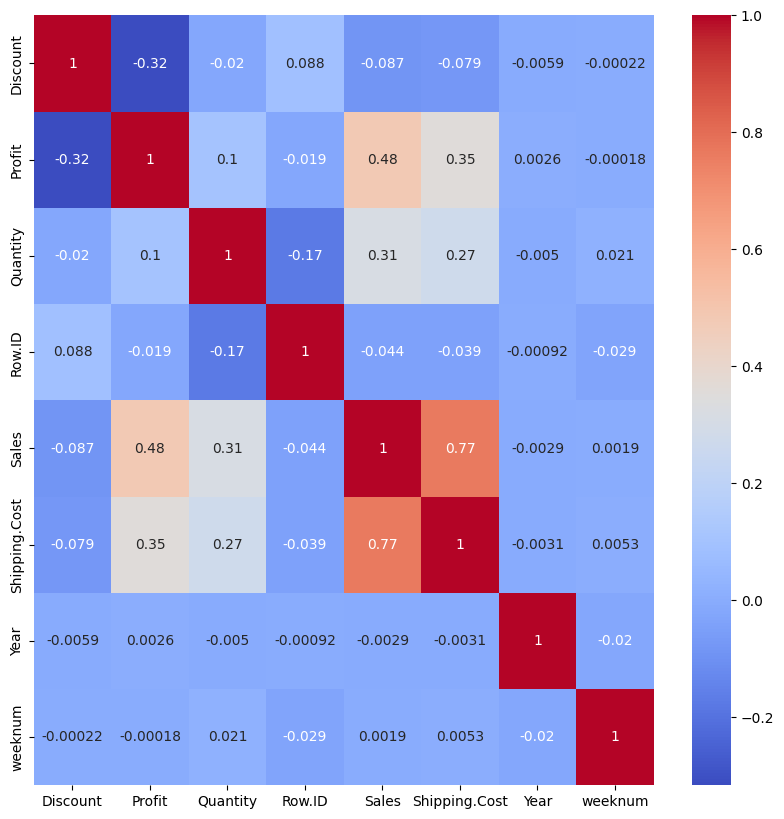

In [30]:
corrs  = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corrs, cmap='coolwarm', annot=True)

In [31]:
def Display_Sales_shipMode():
  shipping_modes = df['Ship.Mode'].unique()

  # Create subplot with multiple columns
  fig = make_subplots(rows=1, cols=len(shipping_modes), subplot_titles=shipping_modes)

  for i, mode in enumerate(shipping_modes):
      mode_data = df[df['Ship.Mode'] == mode]

      scatter_trace = go.Scatter(x=mode_data['Shipping.Cost'], y=mode_data['Sales'], mode='markers', name=mode)
      fig.add_trace(scatter_trace, row=1, col=i+1)

  fig.update_layout(title_text='<b>Sales vs Shipping Cost for Different Shipping Modes</b>',
                    title_font_size = 25,
                    title_font_family = "Liberation Serif",
                    title_font_color="#5b5b5b",
                    xaxis_title='Shipping Cost',
                    yaxis_title='Sales')
  fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig.update_xaxes(tickfont=dict(color='gray'))

  fig.show()
#Display_Sales_shipMode()

In [32]:
def Display_profit_shipMode():
  shipping_modes = df['Ship.Mode'].unique()
  fig = make_subplots(rows=1, cols=len(shipping_modes), subplot_titles=shipping_modes)

  for i , mode in enumerate(shipping_modes):
    mode_data = df[df['Ship.Mode'] == mode]
    scatter_trace = go.Scatter(x=mode_data['Shipping.Cost'], y=mode_data['Profit'], mode='markers', name=mode)
    fig.add_trace(scatter_trace, row=1, col=i+1)

    fig.update_layout(title_text='Profit vs Shipping Cost for Different Shipping Modes',
                    title_font_size = 25,
                    title_font_family = "Liberation Serif",
                    title_font_color="#5b5b5b",
                    xaxis_title='Shipping Cost',
                    yaxis_title='Profit')
  fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig.update_xaxes(tickfont=dict(color='gray'))

  fig.show()

#Display_profit_shipMode()

In [33]:
def Display_discount_profit():
  fig = go.Figure()
  scatter_trace = go.Scatter(x=df['Discount'], y=df['Profit'], mode='markers')
  fig.add_trace(scatter_trace)
  fig.update_layout(title_text='<b>Profit vs Shipping Cost for Different Shipping Modes</b>',
                    title_font_size = 25,
                    title_font_family = "Liberation Serif",
                    title_font_color="#5b5b5b",
                    xaxis_title='Shipping Cost',
                    yaxis_title='Profit')
  fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig.update_xaxes(tickfont=dict(color='gray'))

  fig.show()

#Display_discount_profit()

# **Market Growth and Regions**

Expanding upon the previous analysis, let's delve into the countries that are likely to drive growth within their regional markets. Our initial graph highlights that regions experiencing higher overall sales and profitability often correlate with substantial growth. Examining the period from 2011 to 2014, certain countries have emerged as significant contributors to this growth.

In the APAC market, we initially observe the market share distribution in 2011, with China leading at 34.25 percent, followed by Australia at 21.25 percent, and India. By 2014, the landscape has shifted, with Australia claiming the top spot at an impressive 49.23 percent market share, followed by China at 34.25 percent, and India. However, the critical factor lies in the growth rate during this period.

Australia stands out with the highest growth rate, soaring from an initial proportion of 27.71 to an impressive 102.08 percent. This substantial growth is a testament to Australia's relatively stable and developed economy, fostering consumer confidence and increased spending across various sectors.

India, with a growth proportion of 17.71, saw significant expansion, growing from the original to 69.55 percent. The country's second-largest population globally and a growing pool of talented individuals have contributed to advancements across diverse sectors.

China, while initially holding the top market share, fell to the fourth position in terms of growth rate. Indonesia took the third spot, showcasing its emerging role in driving market growth within the APAC region.

To provide a more personalized exploration, interactive graphs have been developed for you. These graphs allow you to assess the influence of specific countries on markets in your region of interest.

In [34]:
market_growth = pd.pivot_table(data=df , index='Year',columns='Market', values=['Sales','Profit'], aggfunc='sum')
def market_profit():
  data_profit = market_growth['Profit']
  fig = px.bar(data_profit , x=data_profit .index, y=data_profit .columns,barmode='group')
  fig.update_layout(
      title_text = "<b>Yearly Total Profit Growth Across Regional Markets</b>",
      title_font_size = 25,
      title_font_family = "Liberation Serif",
      title_font_color="#5b5b5b",
      xaxis_title = '',
      yaxis_title = '',
      plot_bgcolor= 'white',
      bargap = 0.5,
    )
  fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig.update_xaxes(tickfont=dict(color='gray'))
  fig.show()
#market_profit()

In [35]:
country_growth = df[df['Market']=='APAC'].pivot_table(index=['Country'], columns='Year', values='Sales', aggfunc='sum',fill_value=0)
country_growth['ratio_2011'] = (country_growth[2011] / country_growth[2011].sum()) * 100
country_growth['ratio_2012'] = (country_growth[2012] / country_growth[2011].sum()) * 100
country_growth['ratio_2013'] = (country_growth[2013] / country_growth[2011].sum()) * 100
country_growth['ratio_2014'] = (country_growth[2014] / country_growth[2011].sum()) * 100
country_growth['growth'] = country_growth['ratio_2014'] - country_growth['ratio_2011']
country_grow_sort = country_growth.sort_values('growth',ascending=False)
top_5_country_grow = country_grow_sort.head()

In [45]:
top_5_country_grow.to_csv('top_5_country_grow.csv')

In [46]:
test = pd.read_csv('/content/top_5_country_grow',index_col='Country')
test.head()

,2011,2012,2013,2014,ratio_2011,ratio_2012,ratio_2013,ratio_2014,growth
Country,,,,,,,,,
Australia,137586,203960,268970,314741,21.522563,31.905441,42.074949,49.234901,27.712338
India,91397,141495,151738,205034,14.297223,22.134048,23.736359,32.073447,17.776224
Indonesia,62255,93404,103893,145335,9.738543,14.611178,16.251971,22.734739,12.996196
China,155701,130234,195681,218975,24.356291,20.372491,30.610358,34.254236,9.897945
Philippines,35097,28226,42827,77283,5.490220,4.415390,6.699423,12.089372,6.599152


In [37]:
def Display_growth_ratio():
  column_names = top_5_country_grow.iloc[:, 4:8].columns

  legend_names = [name[6:] for name in column_names]
  fig = px.bar(top_5_country_grow,
              y=top_5_country_grow.index,
              x=column_names,
              barmode='stack',
              color_discrete_sequence=['#03396c', '#005b96', '#6497b1', '#4c4b57'],
              labels={'x': 'Years'},
              title='The Top 5 APAC Countries with Market Share Growth from 2011 to 2014',text_auto=True
              )

  for i, col in enumerate(column_names):
      fig.data[i].name = legend_names[i]

  fig.update_layout(legend_title_text='Legend', legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),title_font_size = 25,
        title_font_family = "Liberation Serif",
        title_font_color="#5b5b5b",
        xaxis_title = '',
        yaxis_title = '',
        plot_bgcolor= 'white')
  fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'))
  fig.update_xaxes(tickfont=dict(color='gray'))

  fig.show()
Display_growth_ratio()

In [38]:
def Display_ratio_slope():
  colors = ['#aec7c8']*5
  colors[0] = '#03396c'
  country_growth_sorted = country_growth.sort_values('growth',ascending=False).head()

  melted_df = pd.melt(country_growth_sorted.reset_index(), id_vars=['Country'], value_vars=['ratio_2011', 'ratio_2014'],
                      var_name='Year', value_name='Sales Ratio')

  melted_df['Year'] = pd.Categorical(melted_df['Year'], categories=['ratio_2011', 'ratio_2014'], ordered=True)

  fig = px.line(melted_df, x='Year', y='Sales Ratio', color='Country',
                labels={'Sales Ratio': 'Sales Ratio'},
                title='<b>Slope Graph of Sales Ratios (2011 and 2014) for APAC Countries</b>',markers=True,color_discrete_sequence=colors,text=melted_df['Sales Ratio'].apply(lambda x:f'<b>{x:.2f}%</b>'))

  fig.update_layout(xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['2011', '2014']),title_font_family = "Liberation Serif",
          title_font_color="#5b5b5b",
          title_font_size = 25,
          xaxis_title = '',
          yaxis_title = '',
          plot_bgcolor= 'white')
  fig.update_yaxes(showgrid=False, gridwidth=0.5, gridcolor='lightgray', griddash='dot', tickfont=dict(color='gray'),ticksuffix='%')
  fig.update_xaxes(tickfont=dict(color='gray'))
  fig.update_traces(line=dict(width=13),
                    marker=dict(size=20),
                    textposition='top right',
                    )

  fig.show()
#Display_ratio_slope()


To find the percentage growth from 2011 to 2014, you can use the formula:

Percentage Growth
=
(
Final Value
−
Initial Value
Initial Value
)
×
100
Percentage Growth=(
Initial Value
Final Value−Initial Value
​
 )×100

In this case, the initial value is the market share in 2011 (24.36%), and the final value is the market share in 2014 (49.23%). Plug in these values into the formula:

Percentage Growth
=
(
49.23
−
24.36
24.36
)
×
100
Percentage Growth=(
24.36
49.23−24.36
​
 )×100

Percentage Growth
=
(
24.87
24.36
)
×
100
Percentage Growth=(
24.36
24.87
​
 )×100

Percentage Growth
≈
102.08
%
Percentage Growth≈102.08%

So, the percentage growth from 2011 to 2014 is approximately
102.08
%
102.08%.

#**Summary**

**1. Product Categories and Sales**

- Office Supplies products lead in the number of orders, representing 60 percent of all product categories.
- Technology and Furniture products follow in order, with Technology having the highest overall sales.
- Technology products stand out for both high sales and profitability, making them a significant contributor to store profits.

**2. Customer Analysis**

- Customers are categorized into Consumer, Corporate, and Home Office groups.
- Notable customers, like JG-158051, provide insights into order patterns and frequency.
- Analysis of one-time purchasers versus repeat customers reveals differences in average order amounts.

**3. Order Placement and Trends:**

- Examining the overall pattern of order placement shows a positive sales trend from 2011 to 2014.
- Peak sales months, especially November and December, indicate the influence of holiday seasons and events.
- While overall sales and profits are growing, the average order amount per person is decreasing, signaling a potential concern.

**4. Market Growth and Regions**

- regions with higher overall sales and profitability contribute significantly to market growth.
- The APAC region has the highest average sales, with Australia showing the highest average profits.
- Analysis of the APAC market from 2011 to 2014 reveals Australia as the leader in growth, followed by India.


**5. Factors Influencing Profitability**

- Correlation analysis highlights relationships between factors such as shipping costs, sales, and profitability.
- Lower wholesale prices and early delivery correlate with higher profitability, while higher shipping costs may lead to increased sales.
- Price reductions can impact profitability, with regions like EMEA having the highest number of discounted products and lower overall profitability.
Interactive Graphs:


In summary, the analysis provides a comprehensive understanding of product sales, customer behavior, order trends, market growth, and factors influencing profitability. The information suggests opportunities for strategic decisions, such as targeted promotions and understanding regional market dynamics.